In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# the folder of gene expression which contains gene expression matrix and parsed data
gene_expression_folder = "/data8t/mtx/scSNV/dataset_v1/kim/data/quantification_stats/gene_expression_matrix"
GENE_MATRIX = "gene_expression_matrix.csv"
FEATURE_PARSE = "feature_parse_matrix.csv"
gene_matrix_file = os.path.join(gene_expression_folder, GENE_MATRIX)
feature_parse_file = os.path.join(gene_expression_folder, FEATURE_PARSE)

In [3]:
# extract gene efficient length from parsed file
feature_parse_df = pd.read_csv(feature_parse_file)
gene_length_df = feature_parse_df[['Geneid', 'Length']]
gene_length_df.set_index('Geneid', inplace=True)
# transform read counts to tpm
gene_matrix_df = pd.read_csv(gene_matrix_file, index_col='Geneid')
#cnt_transformed_save_to_local(gene_matrix_df, gene_length_df, gene_expression_folder)

In [45]:
tmp = gene_matrix_df.loc['ENSG00000210196.2',]

In [57]:
tmp2 = tmp[tmp>=0]

In [58]:
tmp3 = tmp2[tmp2 < 200]

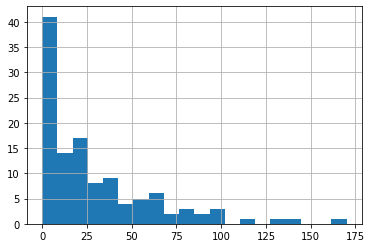

In [59]:
tmp3.hist(bins=20)

In [139]:
tmp = (gene_matrix_df != 0).sum()

In [4]:
def cnt_transformed_save_to_local(gene_df, length_df, outputfolder):
    _ = cnt2tpm(gene_df, length_df,outputfolder)
    _ = cnt2fpkm(gene_df, length_df,outputfolder)
    _ = cnt2cpm(gene_df,outputfolder)

In [5]:
def cnt2tpm(gene_df, length_df, outputfolder=None):
    merged_df = pd.merge(length_df, gene_df, left_index=True,right_index=True)
    merged_df.iloc[:,1:] = merged_df.iloc[:,1:].div(merged_df['Length'], axis=0)
    tpm_df = merged_df.iloc[:,1:].div(merged_df.sum()[1:])  * (10**6)
    if outputfolder:
        outputfile = os.path.join(outputfolder, "gene_expression_matrix_tpm.csv")
        tpm_df.to_csv(outputfile)
    return tpm_df

In [6]:
def cnt2fpkm(gene_df, length_df,outputfolder=None):
    merged_df = pd.merge(length_df, gene_df, left_index=True,right_index=True)
    fpkm_df = merged_df.iloc[:,1:].div(merged_df['Length'], axis=0).div(merged_df.sum()[1:]) * (10**9)
    if outputfolder:
        outputfile = os.path.join(outputfolder, "gene_expression_matrix_fpkm.csv")
        fpkm_df.to_csv(outputfile)
    return fpkm_df

In [27]:
def cnt2cpm(gene_df,outputfolder=None):
    # here I do type-to-int operation to keep cpm integer
    cpm_df = (gene_df.div(gene_df.sum()) * (10**6)).round().astype('int32')
    if outputfolder:
        outputfile = os.path.join(outputfolder, "gene_expression_matrix_cpm.csv")
        cpm_df.to_csv(outputfile)
    return cpm_df

In [39]:
# for GSE57872
exp_read_counts = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/quantification_stats/gene_expression_matrix/gene_expression_matrix.csv',index_col=0)

In [41]:
exp_cpm = cnt2cpm(exp_read_counts)

In [42]:
exp_cpm

,SRR1295086,SRR1294852,SRR1294576,SRR1294525,SRR1295041,SRR1295168,SRR1295049,SRR1295166,SRR1294986,SRR1294494,...,SRR1295034,SRR1294869,SRR1295223,SRR1294792,SRR1294920,SRR1294891,SRR1295050,SRR1294532,SRR1295075,SRR1294685
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000227232.4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
ENSG00000243485.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000268020.2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,436,0,420,0,225,317,276,397,2378,293,...,339,655,2251,1524,440,224,191,652,375,666
ENSG00000210194.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000198727.2,3136,448,571,919,605,4175,1110,2303,0,813,...,1203,3612,3939,1016,3745,672,245,0,206,1840


In [46]:
exp_cpm.to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/quantification_stats/gene_expression_matrix/gene_expression_matrix_cpm_int.csv',)